In [1]:
import os
import sys
import pandas as pd
import numpy as np
sys.path.append("/home/weber/PycharmProjects/EXOTIC/src")
from statannot import add_stat_annotation

from tqdm import tqdm
tqdm.pandas()

pd.options.mode.chained_assignment = None  # default='warn'

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mc
from matplotlib.colors import LogNorm
import json
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D   
from utils.utils import load_config_file

## YAML FILES CONFIG
yaml = load_config_file(config_file="../../clean/src/config_clean_clean.yaml")

# JSON
dicts = json.load(open("../../clean/src/config/EXOTIC_config.json"))


import matplotlib.font_manager as font_manager

font_dirs = ['/home/weber/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.


In [2]:
def output_figure(f, name):
    print(name)
    for ext in ['png', 'jpg']:
        for res in [150, 300]:
            f.savefig(name + '_{}_DPI.{}'.format(res, ext), dpi=res)

In [4]:
def show_values_on_bars(axs, i=0, fontsize=13, rotation=0):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + (p.get_height()) + 20
            if i == 0:
                value = "{:.0f}".format(p.get_height())
            if i == 2:
                value = "{:.2f}".format(p.get_height())

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, str(round(int(value), 0)), ha="center", fontsize=fontsize, rotation=rotation, color='black')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


In [3]:
def convert_bins_into_labels(bins):
    return [" - ".join([str(round(bins[j],2)) + " - " + str(round(bins[j+1],2))]) for j, e in enumerate(bins) if j <len(bins)-1]


In [15]:
dext

,Gene,ranges,mRNA_exons,mRNA_nb,Share,Strand,mRNA_gene,mRNA_nb_total,Ratio,Ratio_num,...,Testis,Thyroid,Uterus,Vagina,Whole Blood,dext_down,dext_up,dext_down_reversed,dext_bins_down,dext_bins_up
0,A2ML1,8975248-8975309,[NM_144670],1,False,1,"[NM_001282424, NM_144670]",2,1/2,0.500000,...,-0.384865,0.156704,-0.116497,-0.000084,0.156704,-0.426334,0.156704,0.426334,0.4 - 0.5,0.1 - 0.2
1,A2ML1,8975778-8975961,[NM_144670],1,False,1,"[NM_001282424, NM_144670]",2,1/2,0.500000,...,-0.384865,0.156704,-0.116497,-0.000084,0.156704,-0.426334,0.156704,0.426334,0.4 - 0.5,0.1 - 0.2
2,A2ML1,8976316-8976478,[NM_144670],1,False,1,"[NM_001282424, NM_144670]",2,1/2,0.500000,...,-0.384865,0.156704,-0.116497,-0.000084,0.156704,-0.426334,0.156704,0.426334,0.4 - 0.5,0.1 - 0.2
3,A2ML1,8982323-8982375,[NM_144670],1,False,1,"[NM_001282424, NM_144670]",2,1/2,0.500000,...,-0.384865,0.156704,-0.116497,-0.000084,0.156704,-0.426334,0.156704,0.426334,0.4 - 0.5,0.1 - 0.2
4,A2ML1,8987258-8987278,[NM_144670],1,False,1,"[NM_001282424, NM_144670]",2,1/2,0.500000,...,-0.384865,0.156704,-0.116497,-0.000084,0.156704,-0.426334,0.156704,0.426334,0.4 - 0.5,0.1 - 0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31601,ZXDC,126178496-126178580,[NM_025112],1,False,0,"[NM_001040653, NM_025112]",2,1/2,0.500000,...,0.081368,0.003594,0.001167,0.017122,-0.009282,-0.084878,0.149057,0.084878,0.0 - 0.1,0.1 - 0.2
31602,ZXDC,126180372-126181063,[NM_001040653],1,False,0,"[NM_001040653, NM_025112]",2,1/2,0.500000,...,0.028248,-0.005509,0.010463,0.011462,-0.117839,-0.117839,0.213527,0.117839,0.1 - 0.2,0.2 - 0.3
31603,ZYX,143079686-143079778,"[NM_001010972, NM_003461]",2,False,1,"[NM_001010972, NM_001362783, NM_003461]",3,2/3,0.666667,...,-0.004742,0.001020,0.020353,0.000293,-0.058430,-0.101818,0.109739,0.101818,0.1 - 0.2,0.1 - 0.2
31604,ZZZ3,78097535-78099039,[NM_015534],1,False,0,"[NM_001308237, NM_015534]",2,1/2,0.500000,...,0.003540,0.004995,0.013714,0.010458,-0.085454,-0.126634,0.115016,0.126634,0.1 - 0.2,0.1 - 0.2


In [118]:
print(cutoff_down, cutoff_up)

0.7218024591830234 0.6909135388995136


In [5]:
dext = pd.read_parquet(yaml['4_DEXT']['Final']['dext'])

bins = [round(e, 2) for e in list(np.arange(0,1.1,0.1))]
labels = convert_bins_into_labels(bins)

dext['dext_down_reversed'] = dext['dext_down'] * (- 1)
dext['dext_bins_down'] = pd.cut(dext['dext_down_reversed'], bins=bins, labels=labels)
dext['dext_bins_up'] = pd.cut(dext['dext_up'], bins=bins, labels=labels)
dext['dext_tissues_up'] = dext[dicts['GTEx_tissues_list'] + ['dext_up']].progress_apply(lambda r: [dicts['GTEx_tissues_list'][j] for j, e in enumerate(r) if e == r['dext_up'] and j < len(dicts['GTEx_tissues_list'])], axis=1)
dext['dext_tissues_down'] = dext[dicts['GTEx_tissues_list'] + ['dext_down']].progress_apply(lambda r: [dicts['GTEx_tissues_list'][j] for j, e in enumerate(r) if e == r['dext_down'] and j < len(dicts['GTEx_tissues_list'])], axis=1)


cutoff_down = dext['dext_down_reversed'].quantile(0.95)
cutoff_up = dext['dext_up'].quantile(0.95)

# dext.loc[(dext['dext_down_reversed'] >= cutoff_down) | (dext['dext_up'] >= cutoff_up)]
dext.loc[(dext['dext_down_reversed'] >= cutoff_down), 'Down'] = True
dext.loc[(dext['dext_up'] >= cutoff_up), 'Up'] = True
dext.loc[(dext['dext_up'] >= cutoff_up) & (dext['dext_down_reversed'] >= cutoff_down), ['Down', 'Up']] = True
dext[['Down', 'Up']] = dext[['Down', 'Up']].fillna(False)
dext


100%|██████████| 31606/31606 [00:09<00:00, 3353.32it/s]


,Gene,ranges,mRNA_exons,mRNA_nb,Share,Strand,mRNA_gene,mRNA_nb_total,Ratio,Ratio_num,...,Whole Blood,dext_down,dext_up,dext_down_reversed,dext_bins_down,dext_bins_up,dext_tissues_up,dext_tissues_down,Down,Up
0,A2ML1,8975248-8975309,[NM_144670],1,False,1,"[NM_001282424, NM_144670]",2,1/2,0.500000,...,0.156704,-0.426334,0.156704,0.426334,0.4 - 0.5,0.1 - 0.2,"[Adipose - Subcutaneous, Adipose - Visceral (O...",[Brain - Cerebellar Hemisphere],False,False
1,A2ML1,8975778-8975961,[NM_144670],1,False,1,"[NM_001282424, NM_144670]",2,1/2,0.500000,...,0.156704,-0.426334,0.156704,0.426334,0.4 - 0.5,0.1 - 0.2,"[Adipose - Subcutaneous, Adipose - Visceral (O...",[Brain - Cerebellar Hemisphere],False,False
2,A2ML1,8976316-8976478,[NM_144670],1,False,1,"[NM_001282424, NM_144670]",2,1/2,0.500000,...,0.156704,-0.426334,0.156704,0.426334,0.4 - 0.5,0.1 - 0.2,"[Adipose - Subcutaneous, Adipose - Visceral (O...",[Brain - Cerebellar Hemisphere],False,False
3,A2ML1,8982323-8982375,[NM_144670],1,False,1,"[NM_001282424, NM_144670]",2,1/2,0.500000,...,0.156704,-0.426334,0.156704,0.426334,0.4 - 0.5,0.1 - 0.2,"[Adipose - Subcutaneous, Adipose - Visceral (O...",[Brain - Cerebellar Hemisphere],False,False
4,A2ML1,8987258-8987278,[NM_144670],1,False,1,"[NM_001282424, NM_144670]",2,1/2,0.500000,...,0.156704,-0.426334,0.156704,0.426334,0.4 - 0.5,0.1 - 0.2,"[Adipose - Subcutaneous, Adipose - Visceral (O...",[Brain - Cerebellar Hemisphere],False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31601,ZXDC,126178496-126178580,[NM_025112],1,False,0,"[NM_001040653, NM_025112]",2,1/2,0.500000,...,-0.009282,-0.084878,0.149057,0.084878,0.0 - 0.1,0.1 - 0.2,[Muscle - Skeletal],[Brain - Nucleus accumbens (basal ganglia)],False,False
31602,ZXDC,126180372-126181063,[NM_001040653],1,False,0,"[NM_001040653, NM_025112]",2,1/2,0.500000,...,-0.117839,-0.117839,0.213527,0.117839,0.1 - 0.2,0.2 - 0.3,[Artery - Tibial],[Whole Blood],False,False
31603,ZYX,143079686-143079778,"[NM_001010972, NM_003461]",2,False,1,"[NM_001010972, NM_001362783, NM_003461]",3,2/3,0.666667,...,-0.058430,-0.101818,0.109739,0.101818,0.1 - 0.2,0.1 - 0.2,[Artery - Tibial],[Liver],False,False
31604,ZZZ3,78097535-78099039,[NM_015534],1,False,0,"[NM_001308237, NM_015534]",2,1/2,0.500000,...,-0.085454,-0.126634,0.115016,0.126634,0.1 - 0.2,0.1 - 0.2,[Cells - EBV-transformed lymphocytes],[Brain - Cerebellar Hemisphere],False,False


In [23]:
dext.loc[(dext['dext_down_reversed'] >= cutoff_down), 'Down'] = True
dext.loc[(dext['dext_up'] >= cutoff_up), 'Up'] = True
dext.loc[(dext['dext_up'] >= cutoff_up) & (dext['dext_down_reversed'] >= cutoff_down), ['Down', 'Up']] = True
dext[['Down', 'Up']] = dext[['Down', 'Up']].fillna(False)

dext.loc[(dext['Down'] == True) | (dext['Up'] == True)]['Gene'].nunique()
dext[['Down', 'Up', 'ranges']].groupby(['Down', 'Up'])['ranges'].count()

Down   Up   
False  False    28449
       True      1578
True   False     1579
Name: ranges, dtype: int64

In [24]:
gtex_colors = pd.read_excel(yaml['4_DEXT']['External']['gtex_colors']).set_index('Tissue')
# gtex_colors['Color'].to_dict()

In [115]:
yaml = load_config_file(config_file="../../clean/src/config_clean_clean.yaml")

gtex_colors = pd.read_excel(yaml['4_DEXT']['External']['gtex_colors']).set_index('Tissue')


output_path = yaml['4_DEXT']['Figures_data']['dext_stats_complete']

up = dext[['dext_tissues_up', 'dext_bins_up']].explode('dext_tissues_up').groupby('dext_tissues_up')['dext_bins_up'].value_counts()
up.name = 'Up'
up = up.reset_index().sort_values(by=['dext_tissues_up', 'dext_bins_up'])
up.columns = ['Tissue', 'dext bins (up)', 'values']
up = up.pivot(columns='dext bins (up)', index='Tissue', values='values').fillna(0).astype(int)


down = dext[['dext_tissues_down', 'dext_bins_down']].explode('dext_tissues_down').groupby('dext_tissues_down')['dext_bins_down'].value_counts()
down.name = 'Down'
down = down.reset_index().sort_values(by=['dext_tissues_down', 'dext_bins_down'])
down.columns = ['Tissue', 'dext bins (down)', 'values']
down = down.pivot(columns='dext bins (down)', index='Tissue', values='values').fillna(0).astype(int)

concat_up_down_stats = pd.concat([up, down], axis=1)

concat_up_down_stats.columns = pd.MultiIndex.from_product([['dext-up','| dext-down |'], list(up.columns)])
# concat_up_down_stats = concat_up_down_stats[['Square'] + [c for c in concat_up_down_stats.columns if c != 'Square']]

writer = pd.ExcelWriter(output_path, engine='xlsxwriter')
concat_up_down_stats.to_excel(writer, sheet_name='Sheet1')

workbook = writer.book
worksheet = writer.sheets['Sheet1']

my_formats = gtex_colors['Color'].to_dict()
my_formats = {'"{}"'.format(k):v for k,v in my_formats.items()}

for val, color in my_formats.items():
    fmt = workbook.add_format({'font_color': color})
    worksheet.conditional_format('A3:A55', {'type': 'cell',
                                           'criteria': '=',
                                           'value': val,
                                           'format': fmt})
writer.save()
# concat_up_down_stats['Square'] = concat_up_down_stats['Square'].apply(lambda r: r.split('_')[1])


concat_up_down_stats

dext-up                      \
                                          0.0 - 0.1 0.1 - 0.2 0.2 - 0.3   
Tissue                                                                    
Adipose - Subcutaneous                          283        57        43   
Adipose - Visceral (Omentum)                    262        43        28   
Adrenal Gland                                   447       180        59   
Artery - Aorta                                  435       156       112   
Artery - Coronary                               226        52        16   
Artery - Tibial                                 495       367       150   
Bladder                                         368       283        97   
Brain - Amygdala                                790       356       215   
Brain - Anterior cingulate cortex (BA24)        619       273        88   
Brain - Caudate (basal ganglia)                 484       121        40   
Brain - Cerebellar Hemisphere                   891       412       334   
Brain - Cerebellum                              672       249       110   
Brain - Cortex                                  546       122        51   
Brain - Frontal Cortex (BA9)                    769       469       245   
Brain - Hippocampus                             668       145        66   
Brain - Hypothalamus                            451       123        65   
Brain - Nucleus accumbens (basal ganglia)       623       192        91   
Brain - Putamen (basal ganglia)                 704       319       141   
Brain - Spinal cord (cervical c-1)              591       166       101   
Brain - Substantia nigra                        638       177        69   
Breast - Mammary Tissue                         148        34         4   
Cells - Cultured fibroblasts                    984      1243      1061   
Cells - EBV-transformed lymphocytes             852       639       537   
Cervix - Ectocervix                             377       121        96   
Cervix - Endocervix                             387       169        61   
Colon - Sigmoid                                 308        71        15   
Colon - Transverse                              256        47        39   
Esophagus - Gastroesophageal Junction           279        54        42   
Esophagus - Mucosa                              469        72        59   
Esophagus - Muscularis                          371       147        74   
Fallopian Tube                                  346       129        62   
Heart - Atrial Appendage                        373        84        48   
Heart - Left Ventricle                          831       308       166   
Kidney - Cortex                                 388        95        77   
Liver                                           897       388       225   
Lung                                            199        63        46   
Minor Salivary Gland                            209        23        29   
Muscle - Skeletal                              1368      1198       794   
Nerve - Tibial                                  209        43        18   
Ovary                                           370        66        26   
Pancreas                                        784       216       133   
Pituitary                                       225        53        30   
Prostate                                        164        25        37   
Skin - Not Sun Exposed (Suprapubic)             270        67        58   
Skin - Sun Exposed (Lower leg)                  380        68        87   
Small Intestine - Terminal Ileum                233        51        44   
Spleen                                          500        95        87   
Stomach                                         413        78        45   
Testis                                          402       342       284   
Thyroid                                         173        41        58   
Uterus                                          225        45        

In [116]:
yaml = load_config_file(config_file="../../clean/src/config_clean_clean.yaml")

gtex_colors = pd.read_excel(yaml['4_DEXT']['External']['gtex_colors']).set_index('Tissue')

output_path = yaml['4_DEXT']['Figures_data']['dext_stats_complete_genes']


up = dext[['dext_tissues_up', 'dext_bins_up', 'Gene']].explode('dext_tissues_up').groupby(['dext_tissues_up', 'dext_bins_up'])['Gene'].nunique()
up.name = 'Up'
up = pd.DataFrame(up).reset_index()
up.columns = ['Tissue', 'dext bins (up)', 'values']
up = pd.pivot(data=pd.DataFrame(up).reset_index(), index='Tissue', columns='dext bins (up)', values='values')


down = dext[['dext_tissues_down', 'dext_bins_down', 'Gene']].explode('dext_tissues_down').groupby(['dext_tissues_down', 'dext_bins_down'])['Gene'].nunique()
down.name = 'Down'
down = pd.DataFrame(down).reset_index()
down.columns = ['Tissue', 'dext bins (down)', 'values']
down = pd.pivot(data=pd.DataFrame(down).reset_index(), index='Tissue', columns='dext bins (down)', values='values')


concat_up_down_stats = pd.concat([up, down], axis=1)

concat_up_down_stats.columns = pd.MultiIndex.from_product([['dext-up','| dext-down |'], list(up.columns)])
# concat_up_down_stats = concat_up_down_stats[['Square'] + [c for c in concat_up_down_stats.columns if c != 'Square']]

writer = pd.ExcelWriter(output_path, engine='xlsxwriter')
concat_up_down_stats.to_excel(writer, sheet_name='Sheet1')

workbook = writer.book
worksheet = writer.sheets['Sheet1']

my_formats = gtex_colors['Color'].to_dict()
my_formats = {'"{}"'.format(k):v for k,v in my_formats.items()}

for val, color in my_formats.items():
    fmt = workbook.add_format({'font_color': color})
    worksheet.conditional_format('A3:A55', {'type': 'cell',
                                           'criteria': '=',
                                           'value': val,
                                           'format': fmt})
writer.save()
# concat_up_down_stats['Square'] = concat_up_down_stats['Square'].apply(lambda r: r.split('_')[1])


concat_up_down_stats

dext-up                      \
                                          0.0 - 0.1 0.1 - 0.2 0.2 - 0.3   
Tissue                                                                    
Adipose - Subcutaneous                          123        26        16   
Adipose - Visceral (Omentum)                    116        19         8   
Adrenal Gland                                   172        67        22   
Artery - Aorta                                  158        70        27   
Artery - Coronary                                99        24        11   
Artery - Tibial                                 243       150        72   
Bladder                                         194       121        58   
Brain - Amygdala                                372       167        84   
Brain - Anterior cingulate cortex (BA24)        269       115        51   
Brain - Caudate (basal ganglia)                 193        58        22   
Brain - Cerebellar Hemisphere                   354       219       130   
Brain - Cerebellum                              260       112        70   
Brain - Cortex                                  222        58        31   
Brain - Frontal Cortex (BA9)                    310       190       122   
Brain - Hippocampus                             276        70        36   
Brain - Hypothalamus                            198        64        33   
Brain - Nucleus accumbens (basal ganglia)       240        84        47   
Brain - Putamen (basal ganglia)                 282       126        80   
Brain - Spinal cord (cervical c-1)              251       106        59   
Brain - Substantia nigra                        250        80        40   
Breast - Mammary Tissue                          72        17         4   
Cells - Cultured fibroblasts                    479       494       436   
Cells - EBV-transformed lymphocytes             387       303       227   
Cervix - Ectocervix                             134        74        37   
Cervix - Endocervix                             210        94        48   
Colon - Sigmoid                                 130        32        13   
Colon - Transverse                              112        19         9   
Esophagus - Gastroesophageal Junction           111        28        11   
Esophagus - Mucosa                              198        47        33   
Esophagus - Muscularis                          148        45        16   
Fallopian Tube                                  200        81        28   
Heart - Atrial Appendage                        152        51        25   
Heart - Left Ventricle                          380       137        65   
Kidney - Cortex                                 181        46        30   
Liver                                           408       181       104   
Lung                                             93        24        12   
Minor Salivary Gland                            110        19        12   
Muscle - Skeletal                               662       511       334   
Nerve - Tibial                                  105        31        10   
Ovary                                           158        45        20   
Pancreas                                        347       116        61   
Pituitary                                       118        41        17   
Prostate                                         86        20         6   
Skin - Not Sun Exposed (Suprapubic)             140        36        14   
Skin - Sun Exposed (Lower leg)                  187        49        27   
Small Intestine - Terminal Ileum                114        27        12   
Spleen                                          195        48        37   
Stomach                                         157        33        13   
Testis                                          261       221       169   
Thyroid                                          80        23        15   
Uterus                                           93        27        

Rectangle(xy=(0, 0), width=-0.4, height=10254, angle=0)
Rectangle(xy=(1, 0), width=-0.4, height=8097, angle=0)
Rectangle(xy=(2, 0), width=-0.4, height=4507, angle=0)
Rectangle(xy=(3, 0), width=-0.4, height=2841, angle=0)
Rectangle(xy=(4, 0), width=-0.4, height=1616, angle=0)
Rectangle(xy=(5, 0), width=-0.4, height=1258, angle=0)
Rectangle(xy=(6, 0), width=-0.4, height=912, angle=0)
Rectangle(xy=(7, 0), width=-0.4, height=647, angle=0)
Rectangle(xy=(8, 0), width=-0.4, height=544, angle=0)
Rectangle(xy=(9, 0), width=-0.4, height=568, angle=0)
Rectangle(xy=(0, 0), width=0.4, height=9422, angle=0)
Rectangle(xy=(1, 0), width=0.4, height=8022, angle=0)
Rectangle(xy=(2, 0), width=0.4, height=5235, angle=0)
Rectangle(xy=(3, 0), width=0.4, height=3143, angle=0)
Rectangle(xy=(4, 0), width=0.4, height=1970, angle=0)
Rectangle(xy=(5, 0), width=0.4, height=1122, angle=0)
Rectangle(xy=(6, 0), width=0.4, height=758, angle=0)
Rectangle(xy=(7, 0), width=0.4, height=680, angle=0)
Rectangle(xy=(8, 0), wi

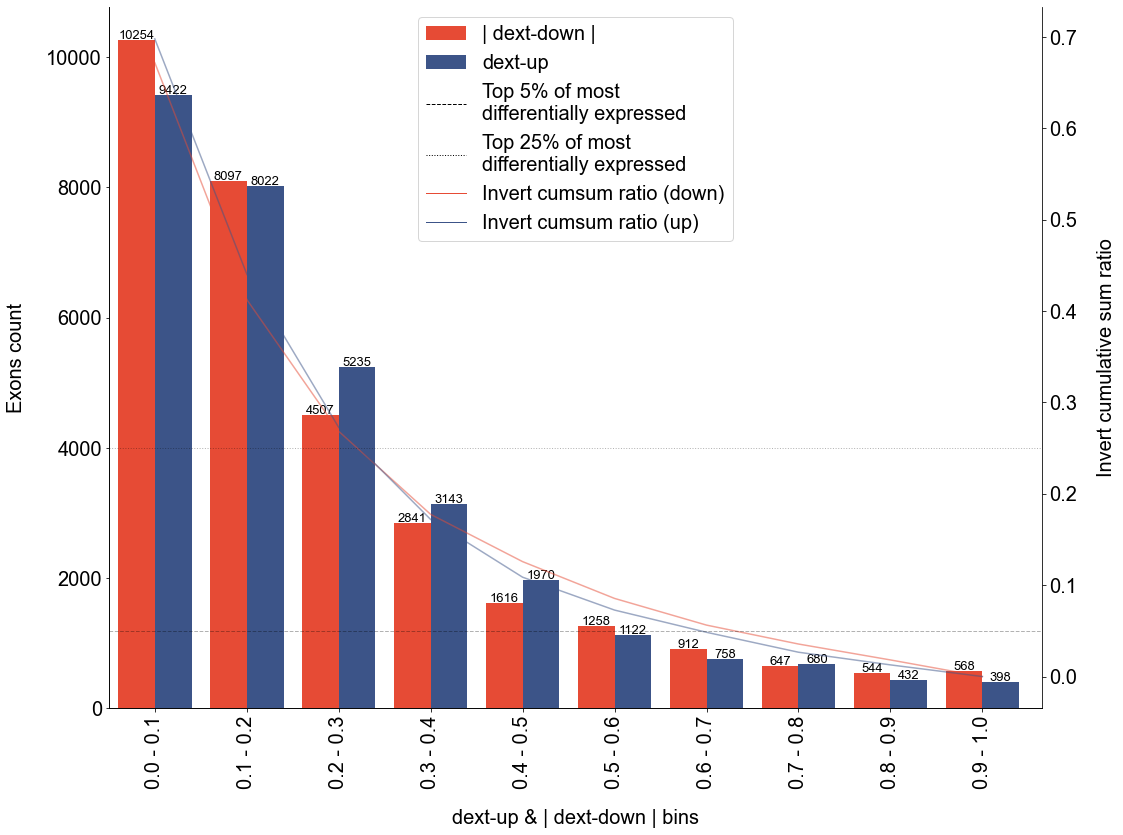

In [6]:
yaml = load_config_file(config_file="../../clean/src/config_clean_clean.yaml")

output_path = yaml['4_DEXT']['Figures_data']['dext_distribution']
        
        
plt.rcParams.update({'font.size': 20})

f, ax = plt.subplots(figsize=(16,12))        
dext['dext_bins_down'].value_counts().sort_index().plot.bar(alpha=1, color='#E64B35FF', width=-0.4, align='edge')
# dext.dext_median.plot.hist(alpha=0.3, color='g', rwidth=0.8)
dext['dext_bins_up'].value_counts().sort_index().plot.bar(alpha=1, width=0.4, color='#3C5488FF', align='edge')


plt.legend()
# ax2.set_ylim(ax.get_ylim())
ax.set_xlim(-0.5,9.65)

show_values_on_bars(ax)
# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)
plt.tight_layout()

ax.set_xlabel('dext-up & | dext-down | bins', labelpad=20)
ax.set_ylabel('Exons count', labelpad=20)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
L=plt.legend()
L.get_texts()[0].set_text('dext-down')
L.get_texts()[1].set_text('dext-up')
# ax.set_xticks(np.arange(0.5,1,0.05))
print(list(ax.get_xticklabels()))
# ax.set_xticklabels([str(e) for e in np.arange(0.5,1.05,0.05)])

ax2 = ax.twinx()

tmp_cumsum_df = pd.concat([pd.DataFrame(dext['dext_bins_down'].value_counts().sort_index()), pd.DataFrame(dext['dext_bins_up'].value_counts().sort_index())], axis=1)
tmp_cumsum_df['Cumsum_down'] = (tmp_cumsum_df['dext_bins_down'].sum() - tmp_cumsum_df['dext_bins_down'].cumsum()) / tmp_cumsum_df['dext_bins_down'].sum()
tmp_cumsum_df['Cumsum_up'] = (tmp_cumsum_df['dext_bins_up'].sum() - tmp_cumsum_df['dext_bins_up'].cumsum()) / tmp_cumsum_df['dext_bins_up'].sum()
tmp_cumsum_df.Cumsum_down.plot.line(color='#E64B35FF', alpha=0.5, ax=ax2)
tmp_cumsum_df.Cumsum_up.plot.line(color='#3C5488FF', alpha=0.5, ax=ax2)
# ax2.spines['right'].set_linewidth(0)
ax2.spines['top'].set_linewidth(0)
axh = ax2.axhline(0.05, color='black', linestyle='--', lw=1, alpha=0.3)
axh = ax2.axhline(0.25, color='black', linestyle=':', lw=1, alpha=0.3)

ax2.set_ylabel('Invert cumulative sum ratio', labelpad=20)

tmp_cumsum_df.to_excel(output_path)

handles, labels = ax.get_legend_handles_labels()
ax.legend().remove()

plt.legend(handles=handles + 
           [ 
               Line2D([0], [0], color='black', lw=1, ls='--'), 
              Line2D([0], [0], color='black', lw=1, ls=':'), 

               Line2D([0], [0], color='#E64B35FF', lw=1), 
               Line2D([0], [0], color='#3C5488FF', lw=1), 
           ], 
           labels=[
               '| dext-down |', 
               'dext-up', 
               'Top 5% of most\ndifferentially expressed', 
               'Top 25% of most\ndifferentially expressed', 

               'Invert cumsum ratio (down)', 
               'Invert cumsum ratio (up)'
           ], 
           loc='upper center')

plt.tight_layout()
# output_figure(f, output_path.replace('.xlsx', ''))

In [130]:

yaml = load_config_file(config_file="../../clean/src/config_clean_clean.yaml")

gtex_colors = pd.read_excel(yaml['4_DEXT']['External']['gtex_colors']).set_index('Tissue')

l = list()
col = 'up'
l.append(dext.loc[dext['dext_{}'.format(col)] > cutoff_up].explode('dext_tissues_{}'.format(col))['dext_tissues_{}'.format(col)].value_counts())
col = 'down'
l.append(dext.loc[dext['dext_{}_reversed'.format(col)] > cutoff_down].explode('dext_tissues_{}'.format(col))['dext_tissues_{}'.format(col)].value_counts())
concat_up_down_exons = pd.concat(l, axis=1).fillna(0).sort_index().astype(int)
concat_up_down_exons['Total'] = concat_up_down_exons.sum(axis=1)
concat_up_down_exons = pd.merge(gtex_colors, concat_up_down_exons, left_index=True, right_index=True).reset_index().rename({'index' : 'Tissue'}, axis=1)
concat_up_down_exons['group'] = 'A'
concat_up_down_exons['log_value'] = concat_up_down_exons['Total'].apply(np.log10)
concat_up_down_exons.columns = ['Tissue', 'Abbrev', 'Color', 'Samples', 'Up exons', 'Down exons', 'Total', 'group' , 'log_value']

concat_up_down_exons.to_excel(yaml['4_DEXT']['Figures_data']['dext_circular_barplot'], index=False)
concat_up_down_exons = concat_up_down_exons.loc[concat_up_down_exons['Total'] > 1].reset_index(drop=True)
concat_up_down_exons.sort_values(by='Total', ascending=False)
# concat_up_down

,Tissue,Abbrev,Color,Samples,Up exons,Down exons,Total,group,log_value
47,Testis,TESTIS,#AAAAAA,322.0,251,629,880,A,2.944483
21,Cells - EBV-transformed lymphocytes,LCL,#CC66FF,147.0,204,316,520,A,2.716003
50,Whole Blood,WHLBLD,#FF00BB,670.0,202,204,406,A,2.608526
36,Muscle - Skeletal,MSCLSK,#AAAAFF,706.0,269,94,363,A,2.559907
20,Cells - Cultured fibroblasts,FIBRBLS,#AAEEFF,483.0,249,88,337,A,2.527630
10,Brain - Cerebellar Hemisphere,BRNCHB,#EEEE00,175.0,148,33,181,A,2.257679
33,Liver,LIVER,#AABB66,208.0,43,57,100,A,2.000000
11,Brain - Cerebellum,BRNCHA,#EEEE00,209.0,48,44,92,A,1.963788
23,Cervix - Endocervix,CERVEND,#CCAADD,NaN,25,31,56,A,1.748188
29,Fallopian Tube,FALLOP,#FFCCCC,NaN,20,30,50,A,1.698970


In [135]:

yaml = load_config_file(config_file="../../clean/src/config_clean_clean.yaml")

gtex_colors = pd.read_excel(yaml['4_DEXT']['External']['gtex_colors']).set_index('Tissue')

l = list()
col = 'up'
l.append(dext.loc[dext['dext_{}'.format(col)] > cutoff_up].explode('dext_tissues_{}'.format(col))['dext_tissues_{}'.format(col)].value_counts())
col = 'down'
l.append(dext.loc[dext['dext_{}_reversed'.format(col)] > cutoff_down].explode('dext_tissues_{}'.format(col))['dext_tissues_{}'.format(col)].value_counts())
concat_up_down_exons = pd.concat(l, axis=1).fillna(0).sort_index().astype(int)
concat_up_down_exons['Total'] = concat_up_down_exons.sum(axis=1)
concat_up_down_exons = pd.merge(gtex_colors, concat_up_down_exons, left_index=True, right_index=True).reset_index().rename({'index' : 'Tissue'}, axis=1)
concat_up_down_exons['group'] = 'A'
concat_up_down_exons['log_value'] = concat_up_down_exons['Total'].apply(np.log10)
concat_up_down_exons.columns = ['Tissue', 'Abbrev', 'Color', 'Samples', 'Up exons', 'Down exons', 'Total', 'group' , 'log_value']
concat_up_down_exons['Down exons'] = -1 * concat_up_down_exons['Down exons']
concat_up_down_exons = concat_up_down_exons.melt(id_vars=['Tissue', 'Color'], value_vars=['Up exons', 'Down exons'])

concat_up_down_exons.to_excel(yaml['4_DEXT']['Figures_data']['dext_vertical_barplot'], index=False)
# concat_up_down_exons = concat_up_down_exons.loc[concat_up_down_exons['Total'] > 1].reset_index(drop=True)
# concat_up_down_exons.sort_values(by='Total', ascending=False)
# concat_up_down

In [132]:
col = 'up'

dext.loc[dext['dext_{}'.format(col)] > 0.6].explode('dext_tissues_{}'.format(col)).groupby('dext_tissues_{}'.format(col))['Gene'].nunique()

dext_tissues_up
Adipose - Subcutaneous                         6
Adipose - Visceral (Omentum)                   2
Adrenal Gland                                  7
Artery - Aorta                                10
Artery - Coronary                              4
Artery - Tibial                               15
Bladder                                       15
Brain - Amygdala                               6
Brain - Anterior cingulate cortex (BA24)       5
Brain - Caudate (basal ganglia)                4
Brain - Cerebellar Hemisphere                 85
Brain - Cerebellum                            14
Brain - Cortex                                 7
Brain - Frontal Cortex (BA9)                  29
Brain - Hippocampus                            5
Brain - Hypothalamus                           2
Brain - Nucleus accumbens (basal ganglia)      6
Brain - Putamen (basal ganglia)                5
Brain - Spinal cord (cervical c-1)            14
Brain - Substantia nigra                       7
Brea

In [131]:

yaml = load_config_file(config_file="../../clean/src/config_clean_clean.yaml")

gtex_colors = pd.read_excel(yaml['4_DEXT']['External']['gtex_colors']).set_index('Tissue')

l = list()
col = 'up'
l.append(dext.loc[dext['dext_{}'.format(col)] > cutoff_up].explode('dext_tissues_{}'.format(col)).groupby('dext_tissues_{}'.format(col))['Gene'].nunique())
col = 'down'
l.append(dext.loc[dext['dext_{}_reversed'.format(col)] > cutoff_down].explode('dext_tissues_{}'.format(col)).groupby('dext_tissues_{}'.format(col))['Gene'].nunique())
concat_up_down_genes = pd.concat(l, axis=1).fillna(0).sort_index().astype(int)

concat_up_down_genes['Total'] = concat_up_down_genes.sum(axis=1)
concat_up_down_genes = pd.merge(gtex_colors, concat_up_down_genes, left_index=True, right_index=True).reset_index().rename({'index' : 'Tissue'}, axis=1)
concat_up_down_genes['group'] = 'A'
concat_up_down_genes['log_value'] = concat_up_down_genes['Total'].apply(np.log10)
concat_up_down_genes.columns = ['Tissue', 'Abbrev', 'Color', 'Samples', 'Up genes', 'Down genes', 'Total', 'group' , 'log_value']
concat_up_down_genes.to_excel(yaml['4_DEXT']['Figures_data']['dext_circular_barplot_genes'], index=False)
concat_up_down_genes= concat_up_down_genes.loc[concat_up_down_genes['Total'] > 1].reset_index(drop=True)

concat_up_down_genes

,Tissue,Abbrev,Color,Samples,Up genes,Down genes,Total,group,log_value
0,Adipose - Subcutaneous,ADPSBQ,#FF6600,581.0,2,4,6,A,0.778151
1,Adipose - Visceral (Omentum),ADPVSC,#FFAA00,469.0,1,1,2,A,0.301030
2,Adrenal Gland,ADRNLG,#33DD33,233.0,5,0,5,A,0.698970
3,Artery - Aorta,ARTAORT,#FF5555,387.0,5,2,7,A,0.845098
4,Artery - Coronary,ARTCRN,#FFAA99,213.0,3,2,5,A,0.698970
5,Artery - Tibial,ARTTBL,#FF0000,584.0,8,4,12,A,1.079181
6,Bladder,BLADDER,#A90000,NaN,10,9,19,A,1.278754
7,Brain - Amygdala,BRNAMY,#EEEE00,129.0,2,5,7,A,0.845098
8,Brain - Anterior cingulate cortex (BA24),BRNACC,#EEEE00,147.0,3,4,7,A,0.845098
9,Brain - Caudate (basal ganglia),BRNCDT,#EEEE00,194.0,3,4,7,A,0.845098


In [124]:
pd.merge(concat_up_down_exons[['Tissue', 'Up exons', 'Down exons', 'Total']], concat_up_down_genes, on='Tissue').sort_values(by='Total_x', ascending=False)

,Tissue,Up exons,Down exons,Total_x,Abbrev,Color,Samples,Up genes,Down genes,Total_y,group,log_value
46,Testis,251,629,880,TESTIS,#AAAAAA,322.0,135,222,357,A,2.552668
21,Cells - EBV-transformed lymphocytes,204,316,520,LCL,#CC66FF,147.0,90,111,201,A,2.303196
49,Whole Blood,202,204,406,WHLBLD,#FF00BB,670.0,88,87,175,A,2.243038
36,Muscle - Skeletal,269,94,363,MSCLSK,#AAAAFF,706.0,89,40,129,A,2.110590
20,Cells - Cultured fibroblasts,249,88,337,FIBRBLS,#AAEEFF,483.0,62,38,100,A,2.000000
10,Brain - Cerebellar Hemisphere,148,33,181,BRNCHB,#EEEE00,175.0,56,24,80,A,1.903090
33,Liver,43,57,100,LIVER,#AABB66,208.0,19,30,49,A,1.690196
11,Brain - Cerebellum,48,44,92,BRNCHA,#EEEE00,209.0,7,25,32,A,1.505150
23,Cervix - Endocervix,25,31,56,CERVEND,#CCAADD,NaN,17,17,34,A,1.531479
29,Fallopian Tube,20,30,50,FALLOP,#FFCCCC,NaN,13,12,25,A,1.397940


In [132]:

yaml = load_config_file(config_file="../../clean/src/config_clean_clean.yaml")

gtex_colors = pd.read_excel(yaml['4_DEXT']['External']['gtex_colors'])

l = list()
col = 'up'
l.append(dext.loc[dext['dext_{}'.format(col)] > cutoff_up].explode('dext_tissues_{}'.format(col)).groupby('dext_tissues_{}'.format(col))['Gene'].nunique())
col = 'down'
l.append(dext.loc[dext['dext_{}_reversed'.format(col)] > cutoff_down].explode('dext_tissues_{}'.format(col)).groupby('dext_tissues_{}'.format(col))['Gene'].nunique())
concat_up_down_genes = pd.concat(l, axis=1).fillna(0).sort_index().astype(int)
concat_up_down_genes.columns = ['Up genes', 'Down genes']
# concat_up_down_genes


concat_up_down_genes['total_genes'] = (concat_up_down_genes['Up genes'] + concat_up_down_genes['Down genes'])
concat_up_down_genes['ratio_up_genes'] = (concat_up_down_genes['Up genes']) / (concat_up_down_genes['total_genes'])
concat_up_down_genes['ratio_down_genes'] = (concat_up_down_genes['Down genes']) / (concat_up_down_genes['total_genes'])
concat_up_down_genes['diff_genes'] = (concat_up_down_genes['Up genes'] - concat_up_down_genes['Down genes']) / (concat_up_down_genes['total_genes'])
concat_up_down_genes = concat_up_down_genes.reset_index().rename({'index' : 'Tissue'}, axis=1)


l = list()
col = 'up'
l.append(dext.loc[dext['dext_{}'.format(col)] > cutoff_up].explode('dext_tissues_{}'.format(col))['dext_tissues_{}'.format(col)].value_counts())
col = 'down'
l.append(dext.loc[dext['dext_{}_reversed'.format(col)] > cutoff_down].explode('dext_tissues_{}'.format(col))['dext_tissues_{}'.format(col)].value_counts())
concat_up_down = pd.concat(l, axis=1).fillna(0).sort_index().astype(int).reset_index().rename({'index' : 'Tissue'}, axis=1)
concat_up_down['total'] = (concat_up_down['dext_tissues_up'] + concat_up_down['dext_tissues_down'])
concat_up_down['diff'] = (concat_up_down['dext_tissues_up'] - concat_up_down['dext_tissues_down']) / (concat_up_down['total'])
concat_up_down['ratio_up_exons'] = (concat_up_down['dext_tissues_up']) / (concat_up_down['total'])
concat_up_down['ratio_down_exons'] = (concat_up_down['dext_tissues_down']) / (concat_up_down['total'])
concat_up_down = pd.merge(concat_up_down, concat_up_down_genes, on='Tissue')

print(concat_up_down.total.quantile(0.10))

print(concat_up_down.total_genes.quantile(0.10))

# concat_up_down = concat_up_down.loc[(concat_up_down['total'] >= 5)  & (concat_up_down['total_genes'] >= 4)]
# # concat_up_down = concat_up_down.sort_values(by='diff')
# concat_up_down = concat_up_down.loc[((concat_up_down['diff'] <= -0.20)  & (concat_up_down['diff_genes'] <= -0.20)) | 
#                                     ((concat_up_down['diff'] >= 0.20)  & (concat_up_down['diff_genes'] >= 0.20))]

concat_up_down.to_excel(yaml['4_DEXT']['Figures_data']['dext_diff_barplot'], index=False)
concat_up_down = concat_up_down.sort_values(by='diff_genes').reset_index(drop=True)
print(concat_up_down.total.rank(pct=True))

concat_up_down


5.0
4.1000000000000005
0     0.019231
1     0.048077
2     0.048077
3     0.423077
4     0.375000
5     0.375000
6     0.115385
7     0.865385
8     0.423077
9     0.490385
10    0.192308
11    0.528846
12    1.000000
13    0.884615
14    0.711538
15    0.663462
16    0.336538
17    0.461538
18    0.557692
19    0.980769
20    0.750000
21    0.788462
22    0.663462
23    0.576923
24    0.240385
25    0.076923
26    0.115385
27    0.846154
28    0.288462
29    0.961538
30    0.826923
31    0.634615
32    0.730769
33    0.769231
34    0.192308
35    0.288462
36    0.923077
37    0.596154
38    0.807692
39    0.692308
40    0.615385
41    0.490385
42    0.942308
43    0.903846
44    0.336538
45    0.528846
46    0.423077
47    0.115385
48    0.192308
49    0.240385
50    0.153846
51    0.288462
Name: total, dtype: float64


,Tissue,dext_tissues_up,dext_tissues_down,total,diff,ratio_up_exons,ratio_down_exons,Up genes,Down genes,total_genes,ratio_up_genes,ratio_down_genes,diff_genes
0,Breast - Mammary Tissue,0,1,1,-1.000000,0.000000,1.000000,0,1,1,0.000000,1.000000,-1.000000
1,Minor Salivary Gland,0,2,2,-1.000000,0.000000,1.000000,0,2,2,0.000000,1.000000,-1.000000
2,Prostate,0,2,2,-1.000000,0.000000,1.000000,0,1,1,0.000000,1.000000,-1.000000
3,Pituitary,0,14,14,-1.000000,0.000000,1.000000,0,6,6,0.000000,1.000000,-1.000000
4,Thyroid,1,12,13,-0.846154,0.076923,0.923077,1,4,5,0.200000,0.800000,-0.600000
5,Brain - Putamen (basal ganglia),2,11,13,-0.692308,0.153846,0.846154,1,4,5,0.200000,0.800000,-0.600000
6,Brain - Hypothalamus,1,4,5,-0.600000,0.200000,0.800000,1,4,5,0.200000,0.800000,-0.600000
7,Brain - Cerebellum,48,44,92,0.043478,0.521739,0.478261,7,25,32,0.218750,0.781250,-0.562500
8,Brain - Amygdala,5,9,14,-0.285714,0.357143,0.642857,2,5,7,0.285714,0.714286,-0.428571
9,Adipose - Subcutaneous,4,13,17,-0.529412,0.235294,0.764706,2,4,6,0.333333,0.666667,-0.333333


In [107]:
concat_up_down.loc[(concat_up_down['diff'] >= 0.20)  & (concat_up_down['diff_genes'] >= 0.20)]


,Tissue,dext_tissues_up,dext_tissues_down,total,diff,ratio_up_exons,ratio_down_exons,Up genes,Down genes,total_genes,ratio_up_genes,ratio_down_genes,diff_genes
30,Cells - Cultured fibroblasts,249,88,337,0.477745,0.738872,0.261128,62,38,100,0.620000,0.380000,0.240000
31,Small Intestine - Terminal Ileum,23,3,26,0.769231,0.884615,0.115385,5,3,8,0.625000,0.375000,0.250000
33,Brain - Frontal Cortex (BA9),28,5,33,0.696970,0.848485,0.151515,7,4,11,0.636364,0.363636,0.272727
36,Muscle - Skeletal,269,94,363,0.482094,0.741047,0.258953,89,40,129,0.689922,0.310078,0.379845
37,Brain - Cerebellar Hemisphere,148,33,181,0.635359,0.817680,0.182320,56,24,80,0.700000,0.300000,0.400000
39,Uterus,11,7,18,0.222222,0.611111,0.388889,8,3,11,0.727273,0.272727,0.454545
40,Stomach,4,1,5,0.600000,0.800000,0.200000,3,1,4,0.750000,0.250000,0.500000
42,Esophagus - Muscularis,7,1,8,0.750000,0.875000,0.125000,4,1,5,0.800000,0.200000,0.600000
43,Esophagus - Gastroesophageal Junction,8,1,9,0.777778,0.888889,0.111111,5,1,6,0.833333,0.166667,0.666667
44,Adrenal Gland,7,0,7,1.000000,1.000000,0.000000,5,0,5,1.000000,0.000000,1.000000


In [110]:
concat_up_down.loc[((concat_up_down['diff'] <= -0.20)  & (concat_up_down['diff_genes'] <= -0.20)) | ((concat_up_down['diff'] >= 0.20)  & (concat_up_down['diff_genes'] >= 0.20))]


,Tissue,dext_tissues_up,dext_tissues_down,total,diff,ratio_up_exons,ratio_down_exons,Up genes,Down genes,total_genes,ratio_up_genes,ratio_down_genes,diff_genes
0,Pituitary,0,14,14,-1.000000,0.000000,1.000000,0,6,6,0.000000,1.000000,-1.000000
1,Thyroid,1,12,13,-0.846154,0.076923,0.923077,1,4,5,0.200000,0.800000,-0.600000
2,Brain - Putamen (basal ganglia),2,11,13,-0.692308,0.153846,0.846154,1,4,5,0.200000,0.800000,-0.600000
3,Brain - Hypothalamus,1,4,5,-0.600000,0.200000,0.800000,1,4,5,0.200000,0.800000,-0.600000
5,Brain - Amygdala,5,9,14,-0.285714,0.357143,0.642857,2,5,7,0.285714,0.714286,-0.428571
6,Brain - Cortex,3,5,8,-0.250000,0.375000,0.625000,2,4,6,0.333333,0.666667,-0.333333
7,Adipose - Subcutaneous,4,13,17,-0.529412,0.235294,0.764706,2,4,6,0.333333,0.666667,-0.333333
8,Skin - Sun Exposed (Lower leg),3,15,18,-0.666667,0.166667,0.833333,3,6,9,0.333333,0.666667,-0.333333
9,Testis,251,629,880,-0.429545,0.285227,0.714773,135,222,357,0.378151,0.621849,-0.243697
30,Cells - Cultured fibroblasts,249,88,337,0.477745,0.738872,0.261128,62,38,100,0.620000,0.380000,0.240000


In [109]:
concat_up_down.loc[(concat_up_down['total'] >= 30)]


,Tissue,dext_tissues_up,dext_tissues_down,total,diff,ratio_up_exons,ratio_down_exons,Up genes,Down genes,total_genes,ratio_up_genes,ratio_down_genes,diff_genes
4,Brain - Cerebellum,48,44,92,0.043478,0.521739,0.478261,7,25,32,0.218750,0.781250,-0.562500
9,Testis,251,629,880,-0.429545,0.285227,0.714773,135,222,357,0.378151,0.621849,-0.243697
10,Liver,43,57,100,-0.140000,0.430000,0.570000,19,30,49,0.387755,0.612245,-0.224490
11,Nerve - Tibial,19,15,34,0.117647,0.558824,0.441176,5,7,12,0.416667,0.583333,-0.166667
14,Brain - Anterior cingulate cortex (BA24),23,8,31,0.483871,0.741935,0.258065,3,4,7,0.428571,0.571429,-0.142857
16,Cells - EBV-transformed lymphocytes,204,316,520,-0.215385,0.392308,0.607692,90,111,201,0.447761,0.552239,-0.104478
17,Spleen,20,17,37,0.081081,0.540541,0.459459,10,12,22,0.454545,0.545455,-0.090909
18,Cervix - Ectocervix,24,23,47,0.021277,0.510638,0.489362,16,19,35,0.457143,0.542857,-0.085714
19,Ovary,9,22,31,-0.419355,0.290323,0.709677,6,7,13,0.461538,0.538462,-0.076923
22,Cervix - Endocervix,25,31,56,-0.107143,0.446429,0.553571,17,17,34,0.500000,0.500000,0.000000
